In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

In [2]:
from osd import Problem
from osd.components import GaussNoise, SmoothSecondDifference
import cvxpy as cvx

In [3]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = (np.sin(2 * np.pi * t * 5 / (500.))
           + np.cos(2 * np.pi * t * 7 / (550.) + np.sin(2 * np.pi * t * 13 / (550.))))
y = signal1 + 0.25 * np.random.randn(len(signal1))

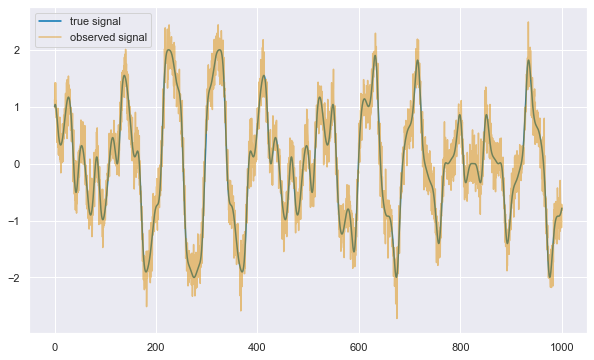

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

In [5]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])

In [6]:
problem.demix(solver='MOSEK')

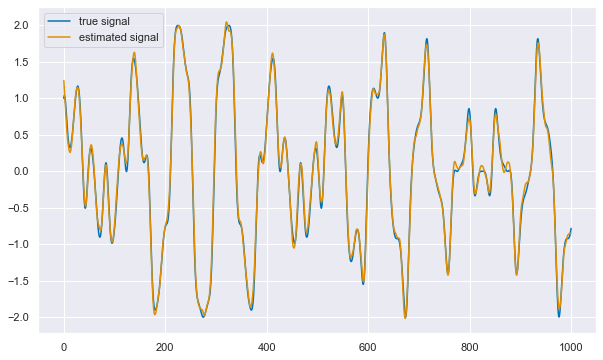

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [17]:
vals = np.logspace(-1, 6, 20)
costs = []
for v in vals:
    problem.components[1].set_parameters(v)
    if len(costs) == 0:
        costs.append(problem.holdout_validation(solver='MOSEK', seed=4))
    else:
        costs.append(problem.holdout_validation(solver='MOSEK', seed=4, reuse=True))
    

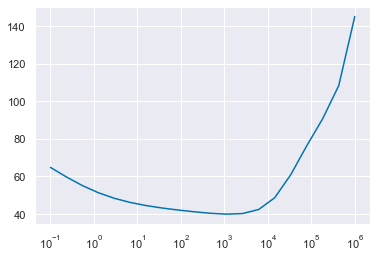

In [18]:
plt.plot(vals, costs)
plt.xscale('log')

In [12]:
problem.components[1].set_parameters(1e1)
problem.holdout_validation(solver='MOSEK')

44.17923399904271

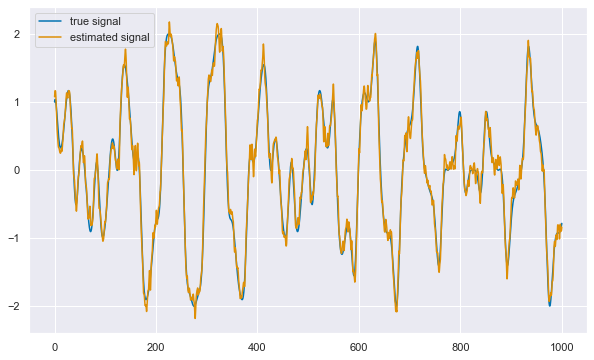

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [14]:
problem.optimize_parameters()

NotImplementedError: 

In [ ]:
np.array(problem.estimates).shape